### Problem statement - Identify the the driving factors or strong indicators behind loan default.  

In [59]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Importing Loan file

In [2]:
df = pd.read_csv(r'C:\Users\tyagittt\Documents\Projects\Personal\UP\loan.csv')
df.head(2)

C:\Users\tyagittt\AppData\Local\Temp\ipykernel_16028\558409307.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\tyagittt\Documents\Projects\Personal\UP\loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


## 1. Data Understanding

#### A) Columns and rows

In [3]:
#Number of rows and columns
print('Number of rows in data - ',df.shape[0])
print('Number of columns in data - ',df.shape[1])

Number of rows in data -  39717
Number of columns in data -  111


#### B) Formats of columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### C) Summary of numerical columns

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,14035.000,2786.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39661.000,0.000,39717.000,0.000,0.000,0.000,39717.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,39661.000,39717.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,39020.000,39678.000,0.000,0.000,0.000,0.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,35.901,69.698,9.294,0.055,13382.528,22.089,51.228,50.990,12153.597,11567.149,9793.349,2263.663,1.363,95.222,12.406,2678.826,0.000,NaN,1.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043,0.000,NaN,NaN,NaN,NaN
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,22.020,43.823,4.400,0.237,15885.017,11.402,375.173,373.824,9042.041,8942.673,7065.522,2608.112,7.290,688.745,148.672,4447.136,0.000,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204,0.000,NaN,NaN,NaN,NaN
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,1.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,18.000,22.000,6.000,0.000,3703.000,13.000,0.000,0.000,5576.930,5112.310,4600.000,662.180,0.000,0.000,0.000,218.680,0.000,NaN,1.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,34.000,90.000,9.000,0.000,8850.000,20.000,0.000,0.000,9899.640,9287.150,8000.000,1348.910,0.000,0

#### D) Null analysis

In [5]:
column_names = list(df.isnull().sum()[df.isnull().sum()>0].keys()) #column names having null values
null_values = list(df.isnull().sum()[df.isnull().sum()>0].values) #no. of null values

#creating a dataframe
df_null = pd.DataFrame({'column_names': column_names,'null_values' : null_values})
df_null['percent_of_total'] = round(df_null['null_values']/df.shape[0],2)*100

print('No. of columns having null values - ',df_null.shape[0])
print('---')
print(' *** Below tables shows columns with - Count of null values and % with respect to total rows in data *** ')
df_null.sort_values('percent_of_total', ascending=False).head(5)

No. of columns having null values -  68
---
 *** Below tables shows columns with - Count of null values and % with respect to total rows in data *** 


,column_names,null_values,percent_of_total
34,bc_open_to_buy,39717,100.000
32,acc_open_past_24mths,39717,100.000
35,bc_util,39717,100.000
37,mo_sin_old_il_acct,39717,100.000
38,mo_sin_old_rev_tl_op,39717,100.000


##### Missing value pattern - Multiple columns has 39,717 as missing values. There might be possibility that for these customers we don't any other data available 

#### E) Outlier Analysis

##### Creating seprate list for categorical and numerical columns

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64']).columns

print('No. of categorical columns - ', len(cat_cols))
print(cat_cols)
print(20*'*')
print('No. of numerical columns - ', len(num_cols))
print(num_cols)

No. of categorical columns -  24
Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')
********************
No. of numerical columns -  87
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mth

##### E.1. Numerical columns - Outlier analysis

In [7]:
#Excluding non-insightful columns 
excl = ['id', 'member_id','collections_12_mths_ex_med', 'policy_code','acc_now_delinq', 'chargeoff_within_12_mths',
        'delinq_amnt','pub_rec_bankruptcies', 'tax_liens']
print(len(num_cols))
num_cols = [e for e in num_cols if e not in excl]
print(len(num_cols))

87
78


##### E.2. Visual outlier - Box plots for all numeric variables

------ loan_amnt -------


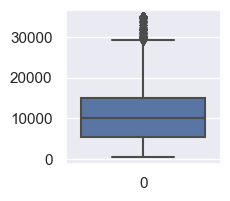

------ funded_amnt -------


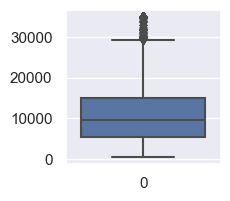

------ funded_amnt_inv -------


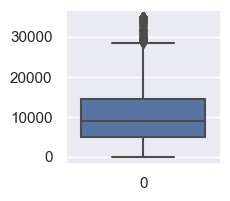

------ installment -------


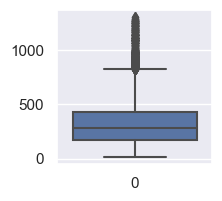

------ annual_inc -------


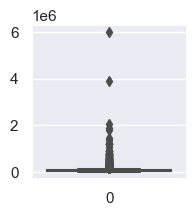

------ dti -------


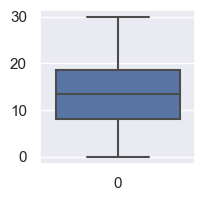

------ delinq_2yrs -------


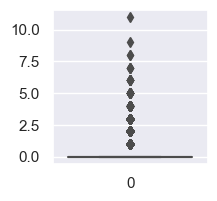

------ inq_last_6mths -------


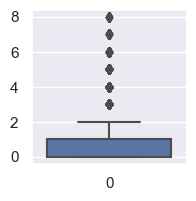

------ mths_since_last_delinq -------


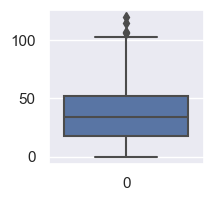

------ mths_since_last_record -------


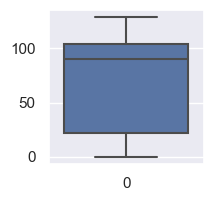

------ open_acc -------


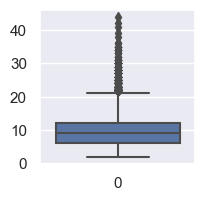

------ pub_rec -------


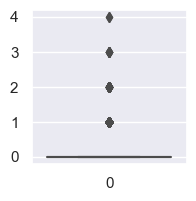

------ revol_bal -------


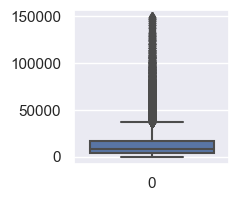

------ total_acc -------


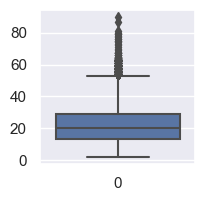

------ out_prncp -------


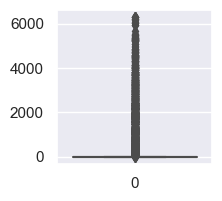

------ out_prncp_inv -------


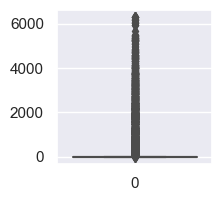

------ total_pymnt -------


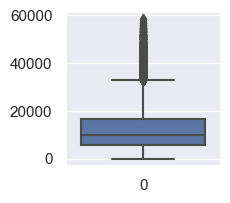

------ total_pymnt_inv -------


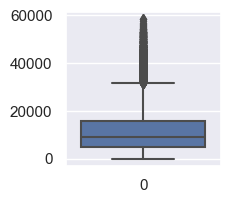

------ total_rec_prncp -------


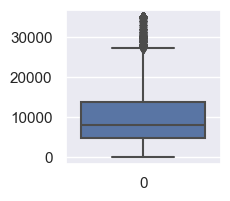

------ total_rec_int -------


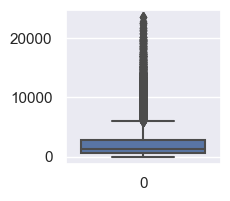

------ total_rec_late_fee -------


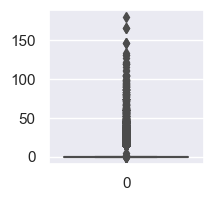

------ recoveries -------


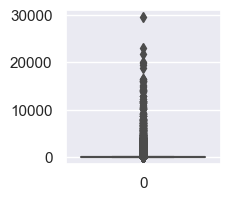

------ collection_recovery_fee -------


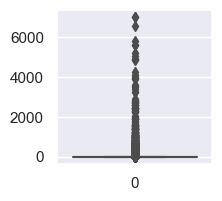

------ last_pymnt_amnt -------


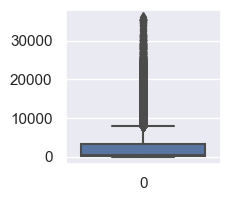

------ mths_since_last_major_derog -------


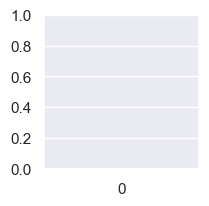

------ annual_inc_joint -------


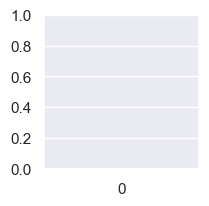

------ dti_joint -------


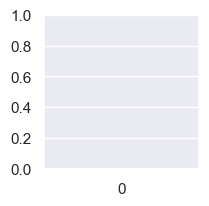

------ verification_status_joint -------


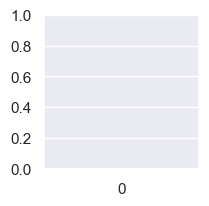

------ tot_coll_amt -------


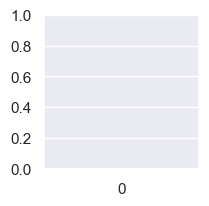

------ tot_cur_bal -------


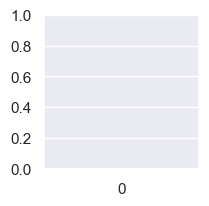

------ open_acc_6m -------


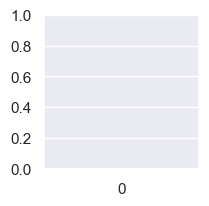

------ open_il_6m -------


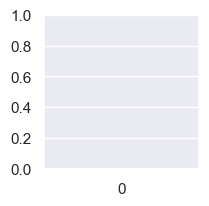

------ open_il_12m -------


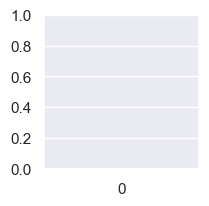

------ open_il_24m -------


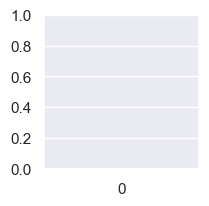

------ mths_since_rcnt_il -------


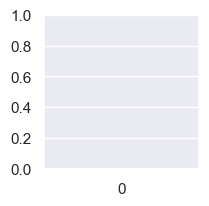

------ total_bal_il -------


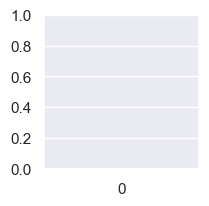

------ il_util -------


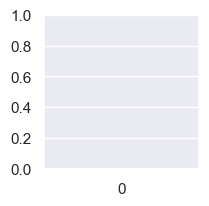

------ open_rv_12m -------


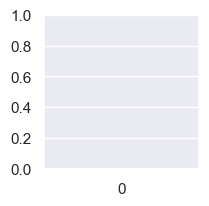

------ open_rv_24m -------


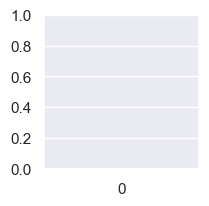

------ max_bal_bc -------


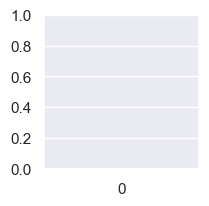

------ all_util -------


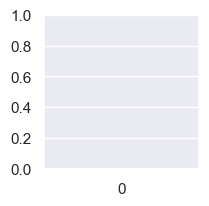

------ total_rev_hi_lim -------


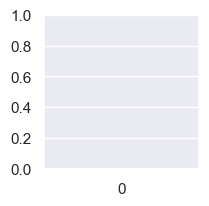

------ inq_fi -------


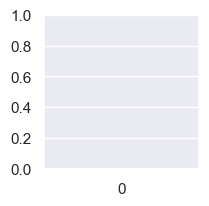

------ total_cu_tl -------


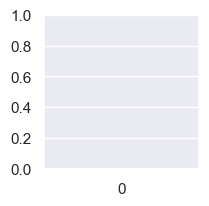

------ inq_last_12m -------


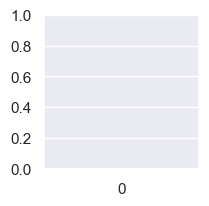

------ acc_open_past_24mths -------


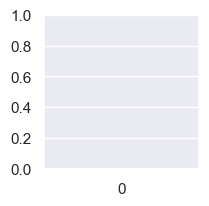

------ avg_cur_bal -------


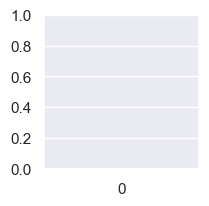

------ bc_open_to_buy -------


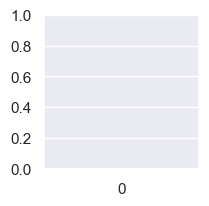

------ bc_util -------


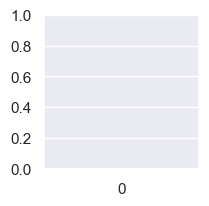

------ mo_sin_old_il_acct -------


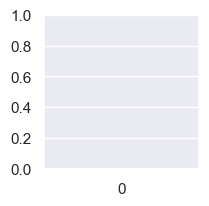

------ mo_sin_old_rev_tl_op -------


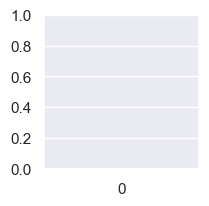

------ mo_sin_rcnt_rev_tl_op -------


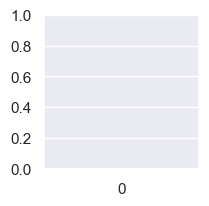

------ mo_sin_rcnt_tl -------


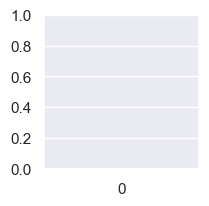

------ mort_acc -------


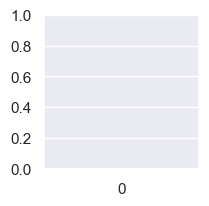

------ mths_since_recent_bc -------


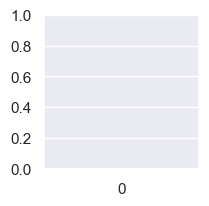

------ mths_since_recent_bc_dlq -------


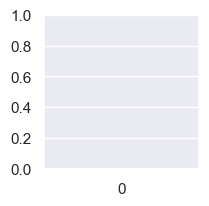

------ mths_since_recent_inq -------


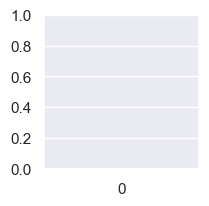

------ mths_since_recent_revol_delinq -------


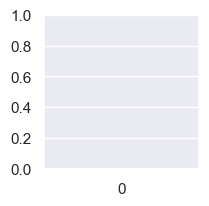

------ num_accts_ever_120_pd -------


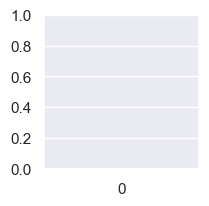

------ num_actv_bc_tl -------


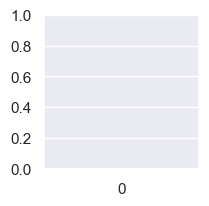

------ num_actv_rev_tl -------


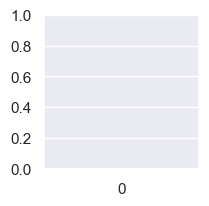

------ num_bc_sats -------


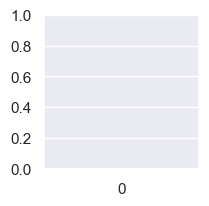

------ num_bc_tl -------


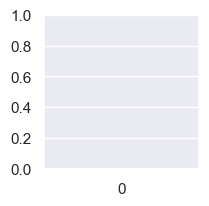

------ num_il_tl -------


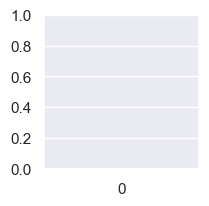

------ num_op_rev_tl -------


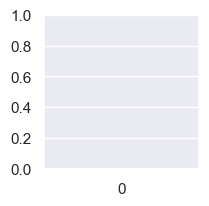

------ num_rev_accts -------


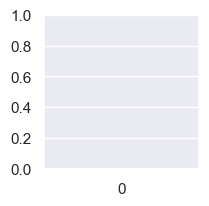

------ num_rev_tl_bal_gt_0 -------


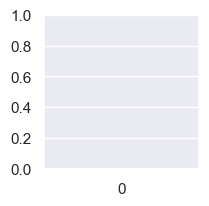

------ num_sats -------


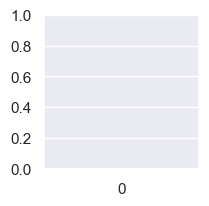

------ num_tl_120dpd_2m -------


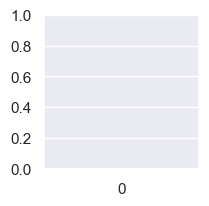

------ num_tl_30dpd -------


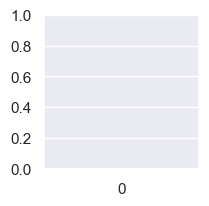

------ num_tl_90g_dpd_24m -------


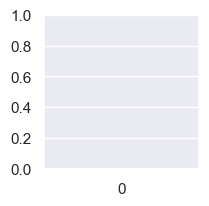

------ num_tl_op_past_12m -------


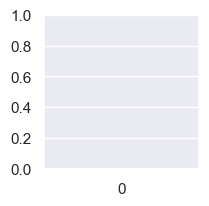

------ pct_tl_nvr_dlq -------


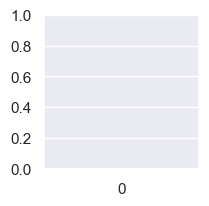

------ percent_bc_gt_75 -------


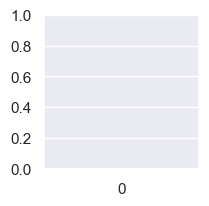

------ tot_hi_cred_lim -------


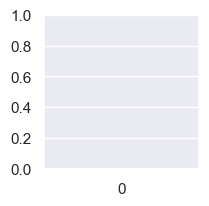

------ total_bal_ex_mort -------


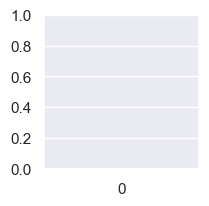

------ total_bc_limit -------


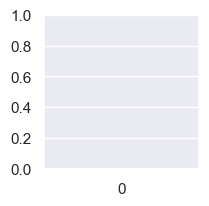

------ total_il_high_credit_limit -------


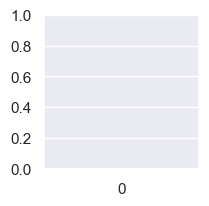

In [8]:
sns.set(rc={'figure.figsize':(2,2)})
for i in num_cols:
    print('------',i,'-------')
    sns.boxplot(data = df[i])
    plt.show()

##### E.3. Statistical technique (IRQ) to identify columns having outliers
IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers

In [9]:
#create a function to find outliers using IQR

def find_outliers_IQR(df, num_cols):
    #creating loop to take all numerical columns one-by-one and share outliers in them
    for i in num_cols:
        q1=df[i].quantile(0.25) #First quartile
        q3=df[i].quantile(0.75) #Third quartile
        IQR=q3-q1 #Difference
        
        outliers = df[((df[i]<(q1-1.5*IQR)) | (df[i]>(q3+1.5*IQR)))]
        
        print('In "',i,'" column',' no. of outlier are - ',len(outliers))

#Applying function on numerical columns 
find_outliers_IQR(df, num_cols)

In " loan_amnt " column  no. of outlier are -  1230
In " funded_amnt " column  no. of outlier are -  1038
In " funded_amnt_inv " column  no. of outlier are -  1000
In " installment " column  no. of outlier are -  1245
In " annual_inc " column  no. of outlier are -  1843
In " dti " column  no. of outlier are -  0
In " delinq_2yrs " column  no. of outlier are -  4312
In " inq_last_6mths " column  no. of outlier are -  3634
In " mths_since_last_delinq " column  no. of outlier are -  4
In " mths_since_last_record " column  no. of outlier are -  0
In " open_acc " column  no. of outlier are -  515
In " pub_rec " column  no. of outlier are -  2116
In " revol_bal " column  no. of outlier are -  2497
In " total_acc " column  no. of outlier are -  525
In " out_prncp " column  no. of outlier are -  1140
In " out_prncp_inv " column  no. of outlier are -  1140
In " total_pymnt " column  no. of outlier are -  1334
In " total_pymnt_inv " column  no. of outlier are -  1441
In " total_rec_prncp " colum

##### F) Variance in column values

In [317]:
print('Categorical columns')
for i in cat_cols:
    print('no. of unique values in',i,' - ',new_df[i].nunique())

Categorical columns
no. of unique values in term  -  2
no. of unique values in int_rate  -  274
no. of unique values in grade  -  7
no. of unique values in sub_grade  -  35
no. of unique values in emp_title  -  11179
no. of unique values in emp_length  -  11
no. of unique values in home_ownership  -  4
no. of unique values in verification_status  -  3
no. of unique values in issue_d  -  46
no. of unique values in loan_status  -  2
no. of unique values in url  -  14070
no. of unique values in desc  -  9331
no. of unique values in purpose  -  14
no. of unique values in title  -  7968
no. of unique values in zip_code  -  744
no. of unique values in addr_state  -  46
no. of unique values in earliest_cr_line  -  470
no. of unique values in revol_util  -  1021
no. of unique values in last_pymnt_d  -  95
no. of unique values in last_credit_pull_d  -  91


##### We can see two problems with the above data:
1. Columns having only 1 unique value: pymnt_plan, initial_list_status, and application_type
2. Columns having a lot of unique values: emp_title, url, desc, etc.

In [319]:
print('Numerical columns')
for i in num_cols:
    print('no. of unique values in',i,' - ',new_df[i].nunique())

Numerical columns
no. of unique values in id  -  14070
no. of unique values in member_id  -  14070
no. of unique values in loan_amnt  -  585
no. of unique values in funded_amnt  -  672
no. of unique values in funded_amnt_inv  -  2994
no. of unique values in installment  -  6907
no. of unique values in annual_inc  -  2348
no. of unique values in dti  -  2701
no. of unique values in delinq_2yrs  -  1
no. of unique values in inq_last_6mths  -  3
no. of unique values in mths_since_last_delinq  -  1
no. of unique values in open_acc  -  20
no. of unique values in pub_rec  -  1
no. of unique values in revol_bal  -  10341
no. of unique values in total_acc  -  52
no. of unique values in out_prncp  -  1
no. of unique values in out_prncp_inv  -  1
no. of unique values in total_pymnt  -  13271
no. of unique values in total_pymnt_inv  -  13213
no. of unique values in total_rec_prncp  -  1288
no. of unique values in total_rec_int  -  12573
no. of unique values in total_rec_late_fee  -  1
no. of uniq

##### We can see there are few column having only 1 unqique value: 
delinq_2yrs, mths_since_last_delinq, pub_rec, etc.

*****************************************************************************************************************************

### 2. Data Cleaning & Manuplation

#### A) Treating missing values
1. All or majority blank (null > 90%): Remove columns
2. Other (null < 90%): Treat with mean, median, or mode depending on the data type

In [10]:
print('Columns having null values - ',df_null.shape[0])
print('Columns having > 90% as blanks/nulls - ', len(df_null[df_null['percent_of_total']>=90]['column_names']))
print('Columns having < 90% as blanks/nulls - ', len(df_null[df_null['percent_of_total']<90]['column_names']))

Columns having null values -  68
Columns having > 90% as blanks/nulls -  56
Columns having < 90% as blanks/nulls -  12


##### A.1. Dropping columns having all or majority (>90%) blank values

In [11]:
#creating list of these columns
column_greater_90_percnt_blank = df_null[df_null['percent_of_total']>=90]['column_names'].to_list()

#Dropping columns from DF. Checking the change in shape before and after
print(df.shape)
df = df.drop(column_greater_90_percnt_blank, axis=1)
print(df.shape)

(39717, 111)
(39717, 55)


##### A.2. Treating columns with few (<90%) blank values
2.1. Categorical columns: Mode can be used n\
2.2. Numerical columns: Mean and median could be used

In [12]:
df_new = df.copy()

In [13]:
print('Columns having < 90% as blanks/nulls - ', len(df_null[df_null['percent_of_total']<90]['column_names']))
df_null[df_null['percent_of_total']<90].sort_values('percent_of_total', ascending=False).reset_index(drop=True)

Columns having < 90% as blanks/nulls -  12


,column_names,null_values,percent_of_total
0,mths_since_last_delinq,25682,65.000
1,desc,12940,33.000
2,emp_title,2459,6.000
3,emp_length,1075,3.000
4,pub_rec_bankruptcies,697,2.000
5,title,11,0.000
6,revol_util,50,0.000
7,last_pymnt_d,71,0.000
8,last_credit_pull_d,2,0.000
9,collections_12_mths_ex_med,56,0.000


In [20]:
#Assigning a variable
col_name = df_null[df_null['percent_of_total']<90]['column_names'].to_list()
len(col_name)

12

In [18]:
df[col_name].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   37258 non-null  object 
 1   emp_length                  38642 non-null  object 
 2   desc                        26777 non-null  object 
 3   title                       39706 non-null  object 
 4   mths_since_last_delinq      14035 non-null  float64
 5   revol_util                  39667 non-null  object 
 6   last_pymnt_d                39646 non-null  object 
 7   last_credit_pull_d          39715 non-null  object 
 8   collections_12_mths_ex_med  39661 non-null  float64
 9   chargeoff_within_12_mths    39661 non-null  float64
 10  pub_rec_bankruptcies        39020 non-null  float64
 11  tax_liens                   39678 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.6+ MB


In [21]:
#Creating variables based on column data type
cat_cols_null = df[col_name].select_dtypes(include=['object']).columns
num_cols_null = df[col_name].select_dtypes(include=['float64']).columns
print('No. of cat columns - ',len(cat_cols_null))
print('No. of numerical columns - ',len(num_cols_null))

No. of cat columns -  7
No. of numerical columns -  5


In [22]:
#Replacing null values

#Catgorical values
df[cat_cols_null] = df[cat_cols_null].fillna(df.mode().iloc[0])

#Numerical values
df[num_cols_null] = df[num_cols_null].fillna(df[num_cols_null].mean())

In [23]:
# Checing for null values
print('Checking for null values')
df.isnull().sum()[df.isnull().sum()>1]

Checking for null values


Series([], dtype: int64)

In [26]:
df.shape

(39717, 55)

#### B) Treating outliers
- Removing values that fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR 

In [24]:
#Creating function that removes outliers and return a new dataframe

def remove_outliers(df, columns_list):
    
    # Calculate quantiles and IQR
    Q1 = df[columns_list].quantile(0.25)
    Q3 = df[columns_list].quantile(0.75)
    IQR = Q3 - Q1

    # Return an array of rows with non-outlier column values
    condition = ~((df[columns_list] < (Q1 - 1.5 * IQR)) | (df[columns_list] > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Apply condition on dataframe using above rules
    new_df = df[condition]
    return new_df

##### Assign different variables for categorical and numerical columns 

In [28]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64']).columns

print('No. of categorical columns - ', len(cat_cols))
print(cat_cols)
print(20*'*')
print('No. of numerical columns - ', len(num_cols))
print(num_cols)

No. of categorical columns -  23
Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')
********************
No. of numerical columns -  32
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12

In [29]:
# Applying function on dataframe and creating a new one
new_df = remove_outliers(df, num_cols)
print(df.shape)
print(new_df.shape)
print('Reduced ',round((new_df.shape[0]/df.shape[0])*100,2),'% of data using IQR')

(39717, 55)
(14070, 55)
Reduced  35.43 % of data using IQR


##### C) In-scope: Exclude "Current" from loan status
Based on the project objective - We will exclude data for people who are currently have on-going loan

In [34]:
new_df = new_df[new_df['loan_status']!= 'Current'].copy()
print('New data shape - ',new_df.shape)

New data shape -  (14070, 55)


##### D) Variance analysis: Having 1 unique value
As these column will not distinguish b/w defulter and non-defaulters so it will notbe any use to get insights

In [155]:
for i in cat_cols:
    print('no. of unique values in',i,' - ',new_df[i].nunique())

no. of unique values in term  -  2
no. of unique values in int_rate  -  274
no. of unique values in grade  -  7
no. of unique values in sub_grade  -  35
no. of unique values in emp_title  -  11179
no. of unique values in emp_length  -  11
no. of unique values in home_ownership  -  4
no. of unique values in verification_status  -  3
no. of unique values in issue_d  -  46
no. of unique values in loan_status  -  2
no. of unique values in pymnt_plan  -  1
no. of unique values in url  -  14070
no. of unique values in desc  -  9331
no. of unique values in purpose  -  14
no. of unique values in title  -  7968
no. of unique values in zip_code  -  744
no. of unique values in addr_state  -  46
no. of unique values in earliest_cr_line  -  470
no. of unique values in revol_util  -  1021
no. of unique values in initial_list_status  -  1
no. of unique values in last_pymnt_d  -  95
no. of unique values in last_credit_pull_d  -  91
no. of unique values in application_type  -  1


In [157]:
print(new_df.shape)
new_df.drop(['pymnt_plan', 'initial_list_status', 'application_type'],axis=1, inplace=True)
print(new_df.shape)

(14070, 55)
(14070, 52)


In [334]:
#Removing numerical columns
num_col_single_value= new_df[num_cols].nunique()[new_df[num_cols].nunique()==1].keys().to_list()

print(new_df.shape)
new_df.drop(num_col_single_value,axis=1, inplace=True)
print(new_df.shape)

(14070, 52)
(14070, 37)


#### **** Variance analysis - Helped us in dropping 18 zero variance (single unique value) columns **** 

### 3. Data Analysis
Target variable - Based on the problem statement, we are trying to undertand drivers that can help us distinguish defaulter and good payers. The column that has defaulter details is - "Loan Status" 

In [158]:
new_df['loan_status'].value_counts()

Fully Paid     13574
Charged Off      496
Name: loan_status, dtype: int64

### 3.1. Seperate categorical and numerical variables

In [336]:
cat_cols = new_df.select_dtypes(include=['object']).columns
num_cols = new_df.select_dtypes(include=['float64','int64']).columns

print('No. of categorical columns - ', len(cat_cols))
print(cat_cols)
print(20*'*')
print('No. of numerical columns - ', len(num_cols))
print(num_cols)

No. of categorical columns -  20
Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')
********************
No. of numerical columns -  17
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt'],
      dtype='object')


### 3.2. Univariate Analysis

#### 3.2.1. Categorical columns
A. Bar plot for columns having few unique values n\
B. Table view - Columns having high unique values 

##### A. Bar Plots

In [166]:
print('No. of categorical - ',len(cat_cols))
cat_cols

No. of categorical -  20


Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [173]:
# Filtering categoiries column having less then 15 unique values
cat_col_new = new_df[cat_cols].nunique()[new_df[cat_cols].nunique()<15].keys().to_list()
cat_col_new

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose']

##### Creating function to add percentage with bars

In [249]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.3
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

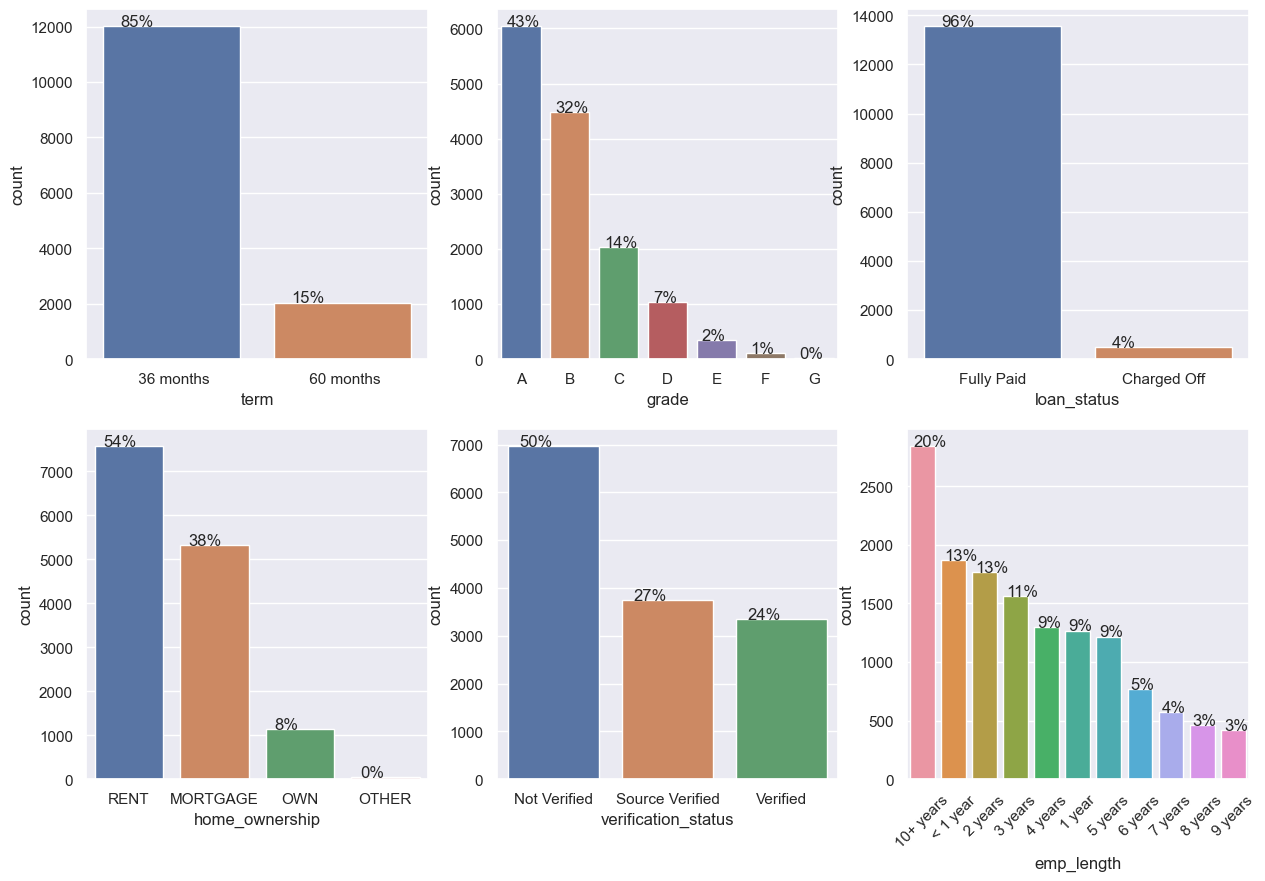

In [250]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

a1 = sns.countplot(ax=axes[0, 0], data = new_df, x = 'term',order= new_df['term'].value_counts().index)
a2 = sns.countplot(ax=axes[0, 1], data = new_df, x = 'grade',order= new_df['grade'].value_counts().index)
a3 = sns.countplot(ax=axes[1, 0], data = new_df, x = 'home_ownership',order= new_df['home_ownership'].value_counts().index)
a4 = sns.countplot(ax=axes[1, 1], data = new_df, x = 'verification_status',order= new_df['verification_status'].value_counts().index)
a5 = sns.countplot(ax=axes[0, 2], data = new_df, x = 'loan_status',order= new_df['loan_status'].value_counts().index)
a6 = sns.countplot(ax=axes[1, 2], data = new_df, x = 'emp_length',order= new_df['emp_length'].value_counts().index)
plt.xticks(rotation=45)

without_hue(a1, new_df['grade'])
without_hue(a2, new_df['term'])
without_hue(a3, new_df['home_ownership'])
without_hue(a4, new_df['verification_status'])
without_hue(a5, new_df['loan_status'])
without_hue(a6, new_df['emp_length'])
plt.show()

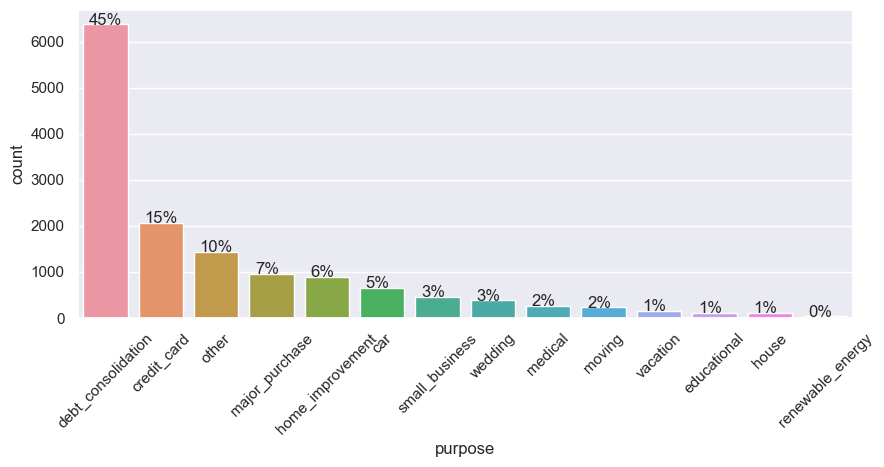

In [251]:
sns.set(rc={'figure.figsize':(10,4)})
a7 = sns.countplot(data = new_df, x = 'purpose',order= new_df['purpose'].value_counts().index)
without_hue(a7, new_df['grade'])
plt.xticks(rotation=45)
plt.show()

##### B. Table view of categorical columns having high unique value

In [257]:
table_col = [col for col in cat_cols if col not in cat_col_new]
print(len(table_col))
print(len(cat_cols))

13
20


In [258]:
table_col

['int_rate',
 'sub_grade',
 'emp_title',
 'issue_d',
 'url',
 'desc',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d']

##### Creating function to have frequency percentage along with values

In [274]:
grade['Count'].sum()

14070

In [278]:
def percent_df(df, column_name):
    new  = new_df[column_name].value_counts().reset_index()
    new.rename(columns = {'index':column_name, column_name:'Count'}, inplace=True)
    new['percent']= round(new['Count'] * 100/new['Count'].sum(),2)
    return new.head(10)

In [289]:
print('All categorical columns values with their frequency percent','\n')
print(percent_df(new_df, 'grade'),'\n')
print(percent_df(new_df, 'int_rate'),'\n')
print(percent_df(new_df, 'sub_grade'),'\n')
print(percent_df(new_df, 'emp_title'),'\n')
print(percent_df(new_df, 'issue_d'),'\n')
print(percent_df(new_df, 'url'),'\n')
print(percent_df(new_df, 'desc'),'\n')
print(percent_df(new_df, 'zip_code'),'\n')
print(percent_df(new_df, 'addr_state'),'\n')
print(percent_df(new_df, 'earliest_cr_line'),'\n')
print(percent_df(new_df, 'revol_util'),'\n')
print(percent_df(new_df, 'last_pymnt_d'),'\n')

All categorical columns values with their frequency percent 

  grade  Count  percent
0     A   6048   42.990
1     B   4485   31.880
2     C   2039   14.490
3     D   1032    7.330
4     E    341    2.420
5     F    105    0.750
6     G     20    0.140 

  int_rate  Count  percent
0    7.51%    471    3.350
1    5.42%    461    3.280
2    7.88%    414    2.940
3    7.49%    354    2.520
4   10.99%    350    2.490
5    6.03%    334    2.370
6    7.90%    299    2.130
7    5.79%    290    2.060
8   11.49%    274    1.950
9    9.99%    258    1.830 

  sub_grade  Count  percent
0        A4   1614   11.470
1        A5   1399    9.940
2        A3   1153    8.190
3        B3   1106    7.860
4        A2   1001    7.110
5        A1    881    6.260
6        B5    867    6.160
7        B4    854    6.070
8        B2    835    5.930
9        B1    823    5.850 

           emp_title  Count  percent
0            US Army    878    6.240
1    Bank of America     32    0.230
2               AT&T    

#### 3.2.2. Numerical columns

In [298]:
new_df[num_cols].head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,162.870,24000.000,27.650,0,1,35.901,3,0,13648,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,171.620,0.000,1,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,84.330,12252.000,8.720,0,2,35.901,2,0,2956,10,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,649.910,0.000,1,0,0.000,0,0.000,0.000
6,1069639,1304742,7000,7000,7000.000,170.080,47004.000,23.510,0,1,35.901,7,0,17726,11,0.000,0.000,10110.840,10110.840,6985.610,3125.230,0.000,0.000,0.000,1313.760,0.000,1,0,0.000,0,0.000,0.000
7,1072053,1288686,3000,3000,3000.000,109.430,48000.000,5.350,0,2,35.901,4,0,8221,4,0.000,0.000,3939.135,3939.140,3000.000,939.140,0.000,0.000,0.000,111.340,0.000,1,0,0.000,0,0.000,0.000


In [337]:
num_cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt'],
      dtype='object')

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Density'>

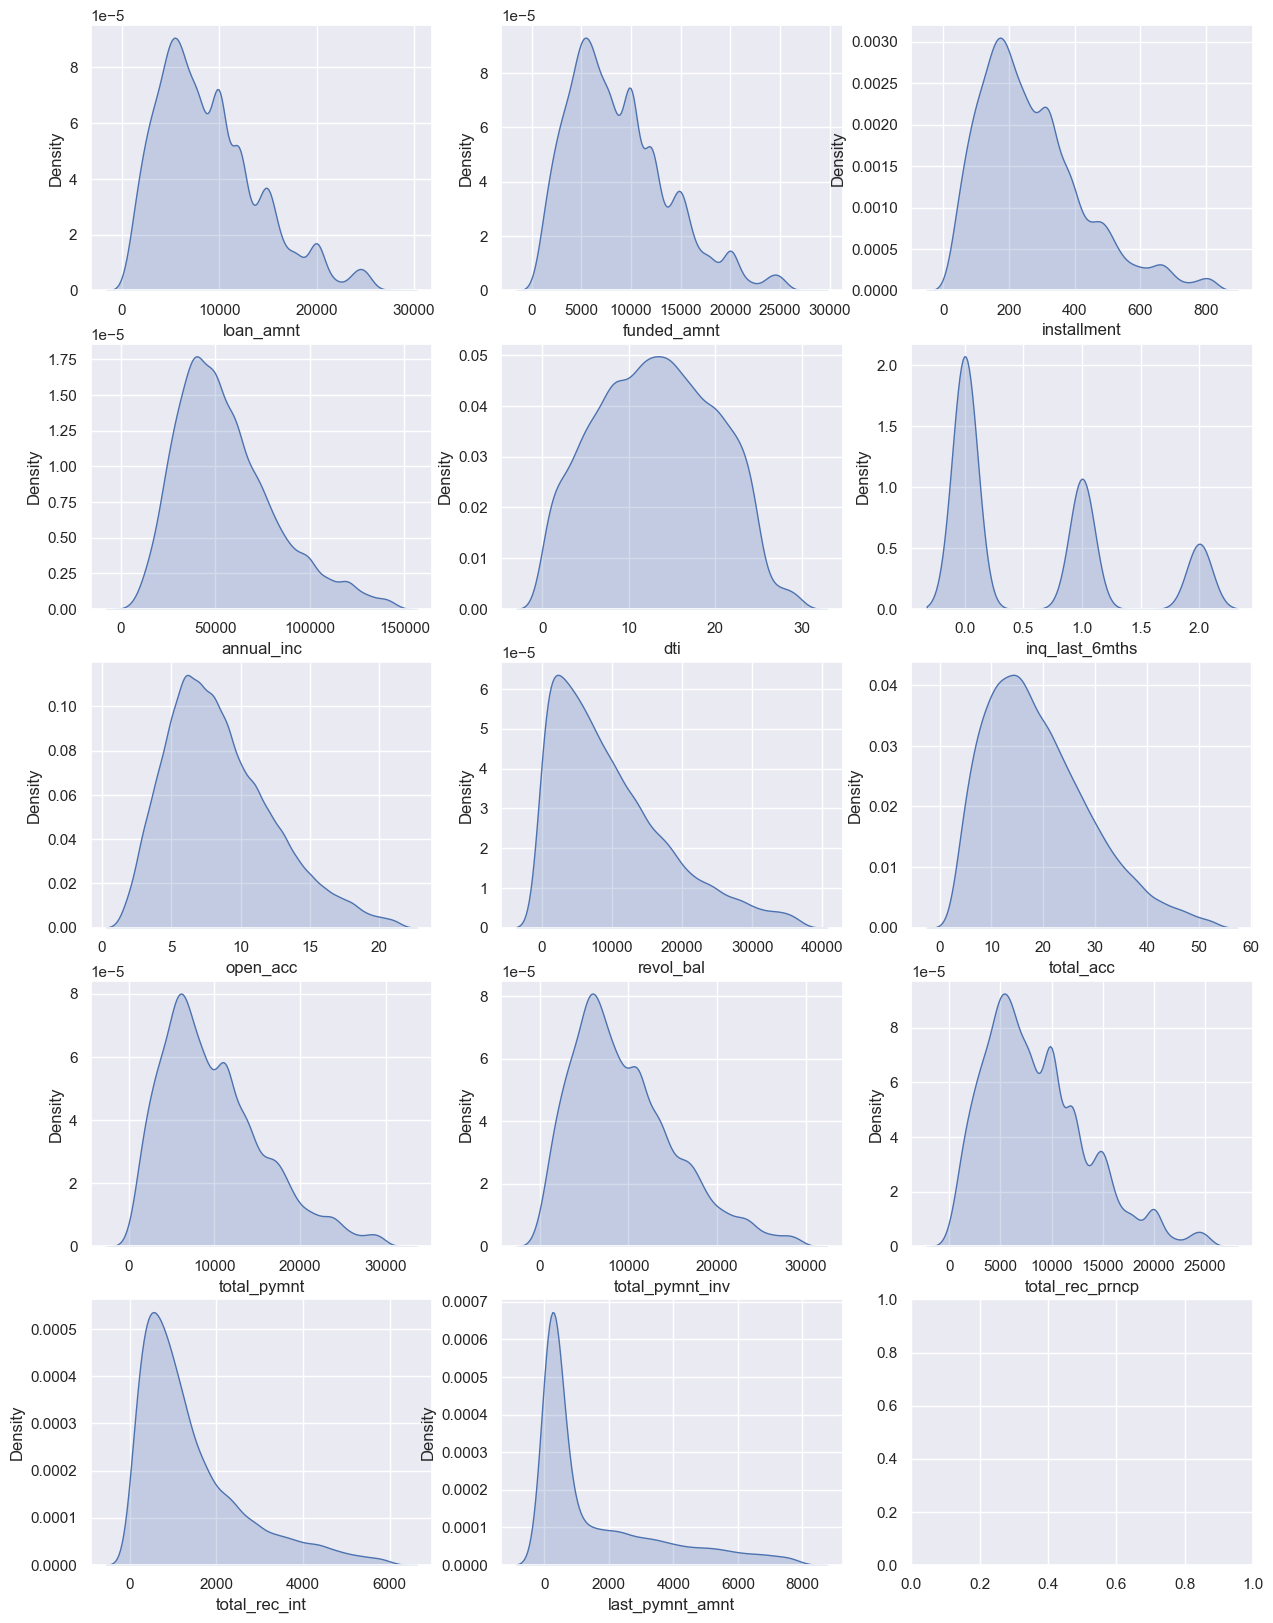

In [347]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

sns.kdeplot(new_df['loan_amnt'], shade=True,ax=axes[0, 0])
sns.kdeplot(new_df['funded_amnt'], shade=True,ax=axes[0, 1])
sns.kdeplot(new_df['installment'], shade=True,ax=axes[0, 2])
sns.kdeplot(new_df['annual_inc'], shade=True,ax=axes[1, 0])
sns.kdeplot(new_df['dti'], shade=True,ax=axes[1, 1])
sns.kdeplot( new_df['inq_last_6mths'], shade=True,ax=axes[1, 2])
sns.kdeplot( new_df['open_acc'], shade=True,ax=axes[2, 0])
sns.kdeplot( new_df['revol_bal'], shade=True,ax=axes[2, 1])
sns.kdeplot( new_df['total_acc'], shade=True,ax=axes[2, 2])
sns.kdeplot( new_df['total_pymnt'], shade=True,ax=axes[3, 0],)
sns.kdeplot( new_df['total_pymnt_inv'], shade=True,ax=axes[3, 1])
sns.kdeplot( new_df['total_rec_prncp'], shade=True,ax=axes[3, 2])
sns.kdeplot( new_df['total_rec_int'], shade=True,ax=axes[4, 0])
sns.kdeplot( new_df['last_pymnt_amnt'], shade=True,ax=axes[4, 1])

### 3.3. Bivariate Analysis